## Exploración de datos de venta en series de tiempo

In [11]:
import pandas as pd
# Carga de dataset de ventas
df_ventas = "..\Data\Venta.csv"
# Cargar el archivo CSV en un DataFrame
df_ventas = pd.read_csv(df_ventas)
# Convertir MES_ID a formato de fecha
df_ventas['MES_ID'] = pd.to_datetime(df_ventas['MES_ID'].astype(str), format='%Y%m')

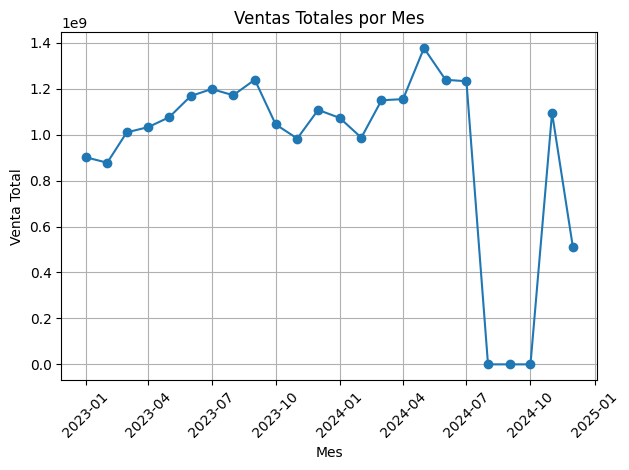

In [31]:
# Generar rango completo de meses desde el mínimo hasta el máximo mes en la base
rango_meses = pd.date_range(start=df_ventas['MES_ID'].min(),
                            end=df_ventas['MES_ID'].max(),
                            freq='MS')  # MS = Month Start

# Crear DataFrame base con todos los meses
todos_los_meses = pd.DataFrame({'MES_ID': rango_meses})

# Agrupar ventas mensuales
ventas_mensuales = df_ventas.groupby('MES_ID')['VENTA_TOTAL'].sum().reset_index()

# Hacer merge con el rango completo para que falte = 0
ventas_completas = todos_los_meses.merge(ventas_mensuales, on='MES_ID', how='left')
ventas_completas['VENTA_TOTAL'] = ventas_completas['VENTA_TOTAL'].fillna(0)

# Plot
plt.plot(ventas_completas['MES_ID'], ventas_completas['VENTA_TOTAL'], marker='o')
plt.title('Ventas Totales por Mes')
plt.xlabel('Mes')
plt.ylabel('Venta Total')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


In [17]:
top_tiendas = df_ventas.groupby('TIENDA_ID')['VENTA_TOTAL'].sum().nlargest(5).reset_index()
print(top_tiendas)

   TIENDA_ID  VENTA_TOTAL
0        927  64741183.41
1        157  60046005.42
2        175  57205140.15
3        916  56819526.14
4        308  54481467.51


In [ ]:
# Obtener mes mínimo y máximo del DataFrame
min_mes = df_ventas['MES_ID'].min()
max_mes = df_ventas['MES_ID'].max()

# Generar todos los meses en el rango
todos_los_meses = pd.date_range(start=min_mes, end=max_mes, freq='MS')  # 'MS' = Month Start

# Extraer los meses presentes
meses_presentes = df_ventas['MES_ID'].drop_duplicates().sort_values()

# Encontrar meses faltantes
meses_faltantes = todos_los_meses.difference(meses_presentes)

print("Meses faltantes:")
print(meses_faltantes)

Meses faltantes:
DatetimeIndex(['2024-08-01', '2024-09-01', '2024-10-01'], dtype='datetime64[ns]', freq='MS')


Meses faltantes dentro de la base:
Agosto, septiembre y octubre de 2024

In [23]:
registros_dic_2024 = df_ventas[df_ventas['MES_ID'] == pd.to_datetime('2024-12')]
cantidad = len(registros_dic_2024)

print(f'Registros en diciembre 2024: {cantidad}')

Registros en diciembre 2024: 1053


In [25]:
# Filtrar hasta julio 2024
historico = df_ventas[df_ventas['MES_ID'] <= pd.to_datetime('2024-07')]
media_historica = historico['VENTA_TOTAL'].mean()
print(f"Media hasta 2024-07: {media_historica:.2f}")


# Media de diciembre 2023
dic_2023 = df_ventas[df_ventas['MES_ID'] == pd.to_datetime('2023-12')]
media_dic_2023 = dic_2023['VENTA_TOTAL'].mean()
print(f"Media en diciembre 2023: {media_dic_2023:.2f}")

# Media de diciembre 2024
dic_2024 = df_ventas[df_ventas['MES_ID'] == pd.to_datetime('2024-12')]
media_dic_2024 = dic_2024['VENTA_TOTAL'].mean()
print(f"Media en diciembre 2024: {media_dic_2024:.2f}")

# Comparaciones
# Comparación diciembre 2024 vs diciembre 2023
delta_23_24 = media_dic_2024 - media_dic_2023
pct_23_24 = (delta_23_24 / media_dic_2023) * 100

# Comparación diciembre 2024 vs histórico
delta_hist_24 = media_dic_2024 - media_historica
pct_hist_24 = (delta_hist_24 / media_historica) * 100

print(f"\nComparación diciembre 2024 vs diciembre 2023:")
print(f"Diferencia: {delta_23_24:.2f} | Variación: {pct_23_24:.2f}%")

print(f"\nComparación diciembre 2024 vs media histórica:")
print(f"Diferencia: {delta_hist_24:.2f} | Variación: {pct_hist_24:.2f}%")


Media hasta 2024-07: 1090629.68
Media en diciembre 2023: 1080625.10
Media en diciembre 2024: 483363.85

Comparación diciembre 2024 vs diciembre 2023:
Diferencia: -597261.25 | Variación: -55.27%

Comparación diciembre 2024 vs media histórica:
Diferencia: -607265.83 | Variación: -55.68%


In [30]:
nov_2024 = df_ventas[df_ventas['MES_ID'] == pd.to_datetime('2024-11')]
media_nov_2024 = nov_2024['VENTA_TOTAL'].mean()

print(f"Media total de ventas en noviembre 2024: {media_nov_2024:.2f}")

Media total de ventas en noviembre 2024: 1040010.93
